In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [110]:
detection_distance = 100
safe_distance = 5

In [111]:
def dist(d1,d2):
    check = np.linalg.norm((d1[0]-d2[0],d1[1]-d2[1]))
    return min(check,10)


In [112]:
k=2*10**5
detection_distance = 200

In [128]:
u1_position = (5,5)
u2_position = (25, 5)
u1_priority = 3
u2_priority = 3

In [148]:
def vector(u1_position, u2_position, u1_priority, u2_priority):
    #print(u1.position, u2.position)
    dist = np.linalg.norm((u1_position[0]-u2_position[0],u1_position[1]-u2_position[1]))
    print(dist)
    f_v = (k/dist**3)*(1/(np.abs(dist-((u2_priority/u1_priority))**2)*safe_distance) - 1/detection_distance)*np.array([u1_position[0]-u2_position[0], u1_position[1]-u2_position[1]])
    #(u2_priority/u1_priority)
    print(f_v)
    theta = np.pi/2
    rot = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
    f_v_ = np.dot(rot, f_v)
    del_v = ((u2_priority/u1_priority)**2)*(-f_v + f_v_)
    #del_v = (f_v + f_v_)

    return del_v


In [149]:
vector(u1_position, u2_position, u1_priority, u2_priority)

20.0
[-2.76315789  0.        ]


array([ 2.76315789, -2.76315789])

14.142135623730951
[10.40840862 10.40840862]
13.514607952107731
[11.80043036 12.9804734 ]
12.92060945777445
[13.21535375 16.15209903]
12.364973189759494
[14.54860719 20.00433489]
11.853095282186635
[15.64257783 24.58119373]
11.390876441946972
[16.28284641 29.85188509]
10.984587248722338
[16.21071145 35.66356518]
10.640636282472386
[15.1625615  41.69704413]
10.36523113726489
[12.94094125 47.45011792]
10.16394535227177
[ 9.50541942 52.27980679]
10.041237288352056
[ 5.04744492 55.5218941 ]
10.0
[ 0.         56.66666667]
10.041237288352056
[-5.04744492 55.5218941 ]
10.16394535227177
[-9.50541942 52.27980679]
10.36523113726489
[-12.94094125  47.45011792]
10.640636282472386
[-15.1625615   41.69704413]
10.984587248722338
[-16.21071145  35.66356518]
11.39087644194697
[-16.28284641  29.85188509]
11.853095282186635
[-15.64257783  24.58119373]
12.364973189759494
[-14.54860719  20.00433489]
12.92060945777445
[-13.21535375  16.15209903]
13.514607952107731
[-11.80043036  12.9804734 ]
14.142135623730

/tmp/ipykernel_46308/83277312.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  f_v = (k/dist**3)*(1/(np.abs(dist-((u2_priority/u1_priority))**2)*safe_distance) - 1/detection_distance)*np.array([u1_position[0]-u2_position[0], u1_position[1]-u2_position[1]])
/tmp/ipykernel_46308/83277312.py:5: RuntimeWarning: invalid value encountered in multiply
  f_v = (k/dist**3)*(1/(np.abs(dist-((u2_priority/u1_priority))**2)*safe_distance) - 1/detection_distance)*np.array([u1_position[0]-u2_position[0], u1_position[1]-u2_position[1]])



11.818181818181818
[ 11.33522457 -27.20453896]
11.49919149152138
[ 10.36442252 -31.09326755]
11.244833524411803
[  8.67203215 -34.68812861]
11.059568236905855
[  6.27153629 -37.62921775]
10.94690416253845
[  3.29726765 -39.56721186]
10.90909090909091
[  0.         -40.24488304]
10.94690416253845
[ -3.29726765 -39.56721186]
11.059568236905855
[ -6.27153629 -37.62921775]
11.244833524411803
[ -8.67203215 -34.68812861]
11.49919149152138
[-10.36442252 -31.09326755]
11.818181818181818
[-11.33522457 -27.20453896]
12.196734422726125
[-11.66430091 -23.32860182]
12.62949453586346
[-11.48374671 -19.68642294]
13.111095547141781
[-10.93987247 -16.4098087 ]
13.636363636363637
[-10.16704403 -13.5560587 ]
14.200453956193916
[ -9.27450584 -11.12940701]
14.798927814636098
[-8.34309914 -9.1015627 ]
15.427784316797402
[-7.42779261 -7.42779261]
16.083460011776484
[-6.56269918 -6.05787616]
16.762808104168887
[-5.7664844  -4.94270092]
17.463066102089588
[-5.04712249 -4.03769799]
18.18181818181818
[-4.405641

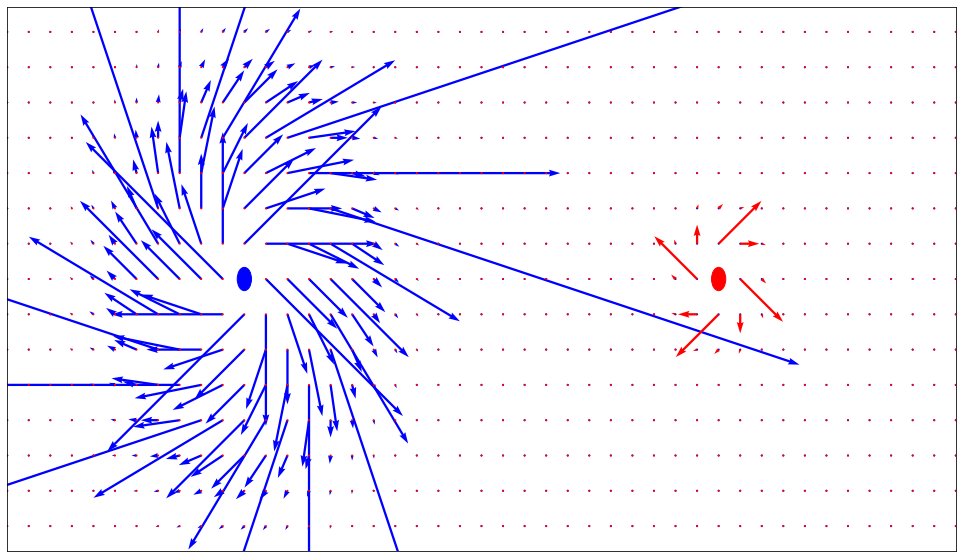

In [150]:


x = np.linspace(-5,35,45)
y= np.linspace(-5,35,45)
X,Y = np.meshgrid(x,y)

u,v = np.meshgrid(x,y)
p,q = np.meshgrid(x, y)
for i in range(len(X)):
    for j in range(len(Y)):
        vec = vector(u1_position, (X[i][j],Y[i][j]), 1, 2)
        u[i][j] = vec[0]
        v[i][j] = vec[1]

for i in range(len(X)):
    for j in range(len(Y)):
        
        vec = vector(u2_position,(X[i][j],Y[i][j]), 2, 1)
        p[i][j] = vec[0]
        q[i][j] = vec[1]


fig, ax = plt.subplots(1,figsize=(17,10))
uav1_circle = plt.Circle(u1_position, 0.3 , color='blue')
uav2_circle = plt.Circle(u2_position, 0.3, color='red')

ax.add_patch(uav1_circle)
ax.add_patch(uav2_circle)

ax.set_xlim(-5,35)
ax.set_ylim(-2,12)


ax.quiver(x,y,u,v, color='blue', pivot='tail',scale=4*10**5)
ax.quiver(x,y,p,q, color='red', pivot='tail',scale=4*10**5)

ax.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)



fig.savefig('/media/storage/agam/drone_launch/gradient plots/diff_a_2.eps')


plt.show()


In [4]:
u

NameError: name 'u' is not defined